In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm, trange

torchvision.datasets.mnist.FashionMNIST

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from tqdm.notebook import trange


torch.manual_seed(42)

#read the data
transform = transforms.ToTensor()
full_train_dataset = datasets.FashionMNIST(root="./datasets", train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root="./datasets", train=False, transform=transform, download=True)

#tran, test, validation split
train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=100, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

#  Define CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 256),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.net(x)

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training with validation
num_epochs = 5
for epoch in trange(num_epochs, desc="Epochs"):
    model.train()
    train_loss = 0.0

    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)

    # Validation 
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    val_acc = 100 * correct / total

    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}, Val Acc = {val_acc:.2f}%")

# Test Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\nTest Accuracy: {100 * correct / total:.2f}%")

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1: Train Loss = 0.5109, Val Loss = 0.3215, Val Acc = 88.11%
Epoch 2: Train Loss = 0.3066, Val Loss = 0.2902, Val Acc = 89.19%
Epoch 3: Train Loss = 0.2600, Val Loss = 0.2554, Val Acc = 90.67%
Epoch 4: Train Loss = 0.2290, Val Loss = 0.2385, Val Acc = 91.22%
Epoch 5: Train Loss = 0.2017, Val Loss = 0.2244, Val Acc = 91.55%

Test Accuracy: 91.51%


In [9]:
len(train_dataset)

48000

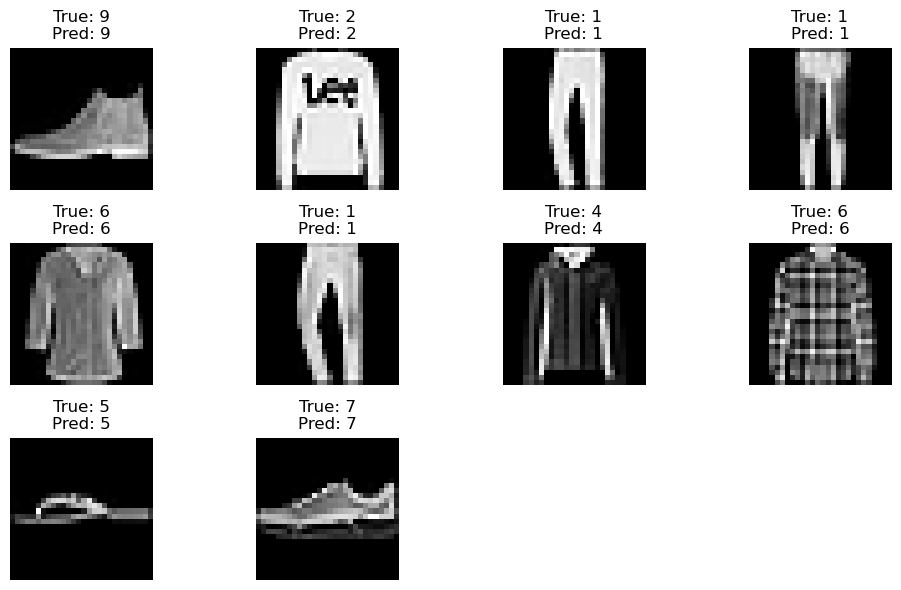

In [8]:
import matplotlib.pyplot as plt

dataiter = iter(test_loader)
images, labels = next(dataiter)

# predict labels
outputs = model(images)
_, predicted = torch.max(outputs, 1)
classes = [str(i) for i in range(10)]

# Plot for predicted labels w/ image data
plt.figure(figsize=(10, 6))
for idx in range(10):
    plt.subplot(3, 4, idx+1)
    plt.imshow(images[idx][0], cmap='gray') 
    plt.title(f"True: {classes[labels[idx]]}\nPred: {classes[predicted[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()